# An Analysis on Environmental Impact of vehicles
*With the provided dataset of car records i will be analysing the Environmental Impact of vehicles by examining fuel effiency (City mpg, Highway mpg) and estimating CO2 emissions and building a training model on predicting CO2 emissions based on vehicle characteristics.*

In [59]:
# The dataset gives us car specifiactions

# It contains detailed specifications, performance metrices, and fuel efficiency data for various car models

# Importing libraries and reading the data

import pandas as pd
import numpy as np
df=pd.read_csv('cars.csv')
df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


## Dimension of the provided dataset

In [60]:
print("dimension of dataset:",df.shape)

dimension of dataset: (5076, 18)


## Total number of observations

In [61]:
print("total observations/instances in the dataset:",len(df))

total observations/instances in the dataset: 5076


## Total number of columns that contain numerical values

In [62]:
print(len(df.select_dtypes(include='number').columns))

9


## List of the columns that contains numerical values

In [63]:
numerical_columns=df.select_dtypes(include='number').columns
print(numerical_columns.tolist())

['Dimensions.Height', 'Dimensions.Length', 'Dimensions.Width', 'Engine Information.Number of Forward Gears', 'Fuel Information.City mpg', 'Fuel Information.Highway mpg', 'Identification.Year', 'Engine Information.Engine Statistics.Horsepower', 'Engine Information.Engine Statistics.Torque']


## Total number and the list of columns that contain categorical values

In [64]:
print(len(df.select_dtypes(include=['object','bool','category']).columns))
print(df.select_dtypes(include=['category','bool','object']).columns.tolist())

9
['Engine Information.Driveline', 'Engine Information.Engine Type', 'Engine Information.Hybrid', 'Engine Information.Transmission', 'Fuel Information.Fuel Type', 'Identification.Classification', 'Identification.ID', 'Identification.Make', 'Identification.Model Year']


## Description of the data

In [65]:
df.describe()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Number of Forward Gears,Fuel Information.City mpg,Fuel Information.Highway mpg,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
count,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000,5076.000000
mean,145.632191,127.825847,144.012411,5.519110,17.275808,24.125493,2010.867612,270.499409,272.707250
std,62.125026,77.358295,79.925899,0.845637,4.479485,6.488293,0.782951,95.293537,100.123328
min,1.000000,2.000000,1.000000,4.000000,8.000000,11.000000,2009.000000,100.000000,98.000000
25%,104.000000,60.000000,62.000000,5.000000,14.000000,20.000000,2010.000000,190.000000,187.000000
50%,152.000000,128.000000,158.000000,6.000000,17.000000,24.000000,2011.000000,266.000000,260.000000
75%,193.000000,198.000000,219.000000,6.000000,20.000000,28.000000,2011.000000,317.000000,335.000000
max,255.000000,255.000000,254.000000,8.000000,38.000000,223.000000,2012.000000,638.000000,774.000000


## Data Types of each column

In [66]:
print(df.dtypes)

Dimensions.Height                                   int64
Dimensions.Length                                   int64
Dimensions.Width                                    int64
Engine Information.Driveline                       object
Engine Information.Engine Type                     object
Engine Information.Hybrid                            bool
Engine Information.Number of Forward Gears          int64
Engine Information.Transmission                    object
Fuel Information.City mpg                           int64
Fuel Information.Fuel Type                         object
Fuel Information.Highway mpg                        int64
Identification.Classification                      object
Identification.ID                                  object
Identification.Make                                object
Identification.Model Year                          object
Identification.Year                                 int64
Engine Information.Engine Statistics.Horsepower     int64
Engine Informa

## Checking if there is  any missing values

In [67]:
missing_values=df.isnull().sum()
print(missing_values)

Dimensions.Height                                  0
Dimensions.Length                                  0
Dimensions.Width                                   0
Engine Information.Driveline                       0
Engine Information.Engine Type                     0
Engine Information.Hybrid                          0
Engine Information.Number of Forward Gears         0
Engine Information.Transmission                    0
Fuel Information.City mpg                          0
Fuel Information.Fuel Type                         0
Fuel Information.Highway mpg                       0
Identification.Classification                      0
Identification.ID                                  0
Identification.Make                                0
Identification.Model Year                          0
Identification.Year                                0
Engine Information.Engine Statistics.Horsepower    0
Engine Information.Engine Statistics.Torque        0
dtype: int64


## checking for duplicate values and cleaning

In [68]:
duplicates=df.duplicated()
print("number of duplicate rows:",duplicates.sum())

number of duplicate rows: 18


**Duplicate rows in the Data set:**

In [69]:
duplicate_rows=df[duplicates]
print("duplicate rows:")
print(duplicate_rows)

duplicate rows:
      Dimensions.Height  Dimensions.Length  Dimensions.Width  \
4                   140                143               202   
121                  35                150                52   
1389                212                108               135   
2203                112                 22               181   
2343                148                 98                57   
3569                133                176               237   
3570                143                176               237   
3640                112                140               181   
3703                145                202               224   
3704                125                 36               166   
3705                148                 51               226   
4197                 95                253               212   
4208                143                253               212   
4313                138                 36               212   
4314                143 

**Cleaning the duplicate rows:**

In [70]:
df_cleaned=df.drop_duplicates()
print("cleaned dataset:")
df_cleaned.head()

cleaned dataset:


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
5,91,17,62,All-wheel drive,Audi 3.2L 6 cylinder 265hp 243 ft-lbs,True,6,6 Speed Manual,16,Gasoline,27,Manual transmission,2009 Audi A5 3.2,Audi,2009 Audi A5,2009,265,243


**shape of the cleaned data set:**

In [71]:
print(df_cleaned.shape)

(5058, 18)


## Identifying the outliers

In [72]:
from scipy import stats

# Z-scores for City mpg and Highway mpg
z_scores_city_mpg = np.abs(stats.zscore(df_cleaned['Fuel Information.City mpg']))
z_scores_highway_mpg = np.abs(stats.zscore(df_cleaned['Fuel Information.Highway mpg']))

outliers_city_mpg = df_cleaned[z_scores_city_mpg > 3]
outliers_highway_mpg = df_cleaned[z_scores_highway_mpg > 3]

print("Outliers in City mpg:", outliers_city_mpg)
print("Outliers in Highway mpg:", outliers_highway_mpg)


Outliers in City mpg:       Dimensions.Height  Dimensions.Length  Dimensions.Width  \
134                 193                 57               160   
645                 170                235                39   
1036                114                239               203   
1037                114                239               203   
1050                185                212                41   
4684                205                  2                41   
5056                114                239               203   
5057                114                239               203   

     Engine Information.Driveline  \
134             Front-wheel drive   
645             Front-wheel drive   
1036            Front-wheel drive   
1037            Front-wheel drive   
1050            Front-wheel drive   
4684            Front-wheel drive   
5056            Front-wheel drive   
5057            Front-wheel drive   

                         Engine Information.Engine Type  \
134     

## Replacing the outlier with median

In [73]:
threshold = 3

# Replace outliers in City mpg with the median of the column
df_cleaned.loc[z_scores_city_mpg > threshold, 'Fuel Information.City mpg'] = df_cleaned['Fuel Information.City mpg'].median()

# Replace outliers in Highway mpg with the median of the column
df_cleaned.loc[z_scores_highway_mpg > threshold, 'Fuel Information.Highway mpg'] = df_cleaned['Fuel Information.Highway mpg'].median()

# Check the cleaned data
df_cleaned.head()


,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
5,91,17,62,All-wheel drive,Audi 3.2L 6 cylinder 265hp 243 ft-lbs,True,6,6 Speed Manual,16,Gasoline,27,Manual transmission,2009 Audi A5 3.2,Audi,2009 Audi A5,2009,265,243


## Distribution Pattern of City MPG and highway MPG

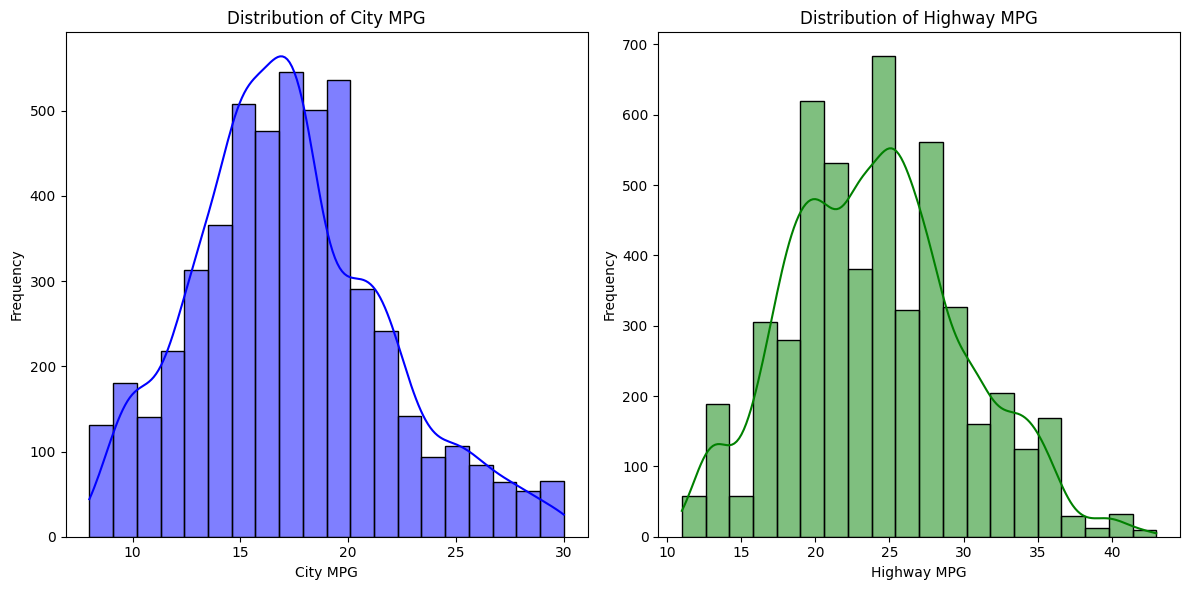

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
#city mpg
plt.subplot(1,2,1)
sns.histplot(df_cleaned['Fuel Information.City mpg'],kde=True,bins=20,color='blue')
plt.title('Distribution of City MPG')
plt.xlabel('City MPG')
plt.ylabel('Frequency')
#highway mpg
plt.subplot(1,2,2)
sns.histplot(df_cleaned['Fuel Information.Highway mpg'],kde=True,bins=20,color='green')
plt.title('Distribution of Highway MPG')
plt.xlabel('Highway MPG')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Estimating CO2 Emissions

In [76]:
df_cleaned.loc[:, 'City CO2 (g/mile)'] = 8887 / df_cleaned['Fuel Information.City mpg']
df_cleaned.loc[:, 'Highway CO2 (g/mile)'] = 8887 / df_cleaned['Fuel Information.Highway mpg']
df_cleaned.loc[:, 'Average CO2 (g/mile)'] = (df_cleaned['City CO2 (g/mile)'] + df_cleaned['Highway CO2 (g/mile)']) / 2

In [77]:
df_cleaned.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,...,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque,City CO2 (g/mile),Highway CO2 (g/mile),Average CO2 (g/mile)
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,...,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236,493.722222,355.480000,424.601111
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,...,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207,403.954545,317.392857,360.673701
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,...,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207,423.190476,296.233333,359.711905
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,...,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207,423.190476,317.392857,370.291667
5,91,17,62,All-wheel drive,Audi 3.2L 6 cylinder 265hp 243 ft-lbs,True,6,6 Speed Manual,16,Gasoline,...,Manual transmission,2009 Audi A5 3.2,Audi,2009 Audi A5,2009,265,243,555.437500,329.148148,442.292824


## Training a model to predict CO₂ emissions based on vehicle characteristics

In [79]:
# Creating interaction and log features using .loc to avoid SettingWithCopyWarning
df_cleaned.loc[:, 'Horsepower_CityMPG_Interaction'] = df_cleaned['Engine Information.Engine Statistics.Horsepower'] * df_cleaned['Fuel Information.City mpg']
df_cleaned.loc[:, 'Log_Horsepower'] = np.log(df_cleaned['Engine Information.Engine Statistics.Horsepower'])
df_cleaned.loc[:,'Horsepower_per_HighwayMPG'] = df_cleaned['Engine Information.Engine Statistics.Horsepower'] / df_cleaned['Fuel Information.Highway mpg']

# selecting relevent features
features = [
    'Dimensions.Length',
    'Dimensions.Width',
    'Dimensions.Height',
    'Engine Information.Driveline',
    'Engine Information.Transmission',
    'Engine Information.Hybrid',
    'Horsepower_CityMPG_Interaction',
    'Log_Horsepower'
]

X = df_cleaned[features]
y = df_cleaned['Average CO2 (g/mile)']

In [80]:
# Convert categorical variables into numerical format using one-hot encoding or label encoding.
from sklearn.preprocessing import OneHotEncoder

# Initialize the encoder, removing 'sparse' argument
encoder = OneHotEncoder(drop='first', handle_unknown='ignore') # 'sparse' has been removed, adding handle_unknown='ignore' for safety

# Encode categorical variables
categorical_features = ['Engine Information.Driveline', 'Engine Information.Transmission', 'Engine Information.Hybrid']
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

In [81]:
# dividing the data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

### Building the linear regression model

In [82]:
# importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [83]:
# initializing the train model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

Assessing the performance of the model using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.

In [84]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error: ",mae)
print("Mean Squared Error: ",mse)
print("R-squared: ",r2)

Mean Absolute Error:  23.148125973458736
Mean Squared Error:  977.6081127692681
R-squared:  0.9375653060510544


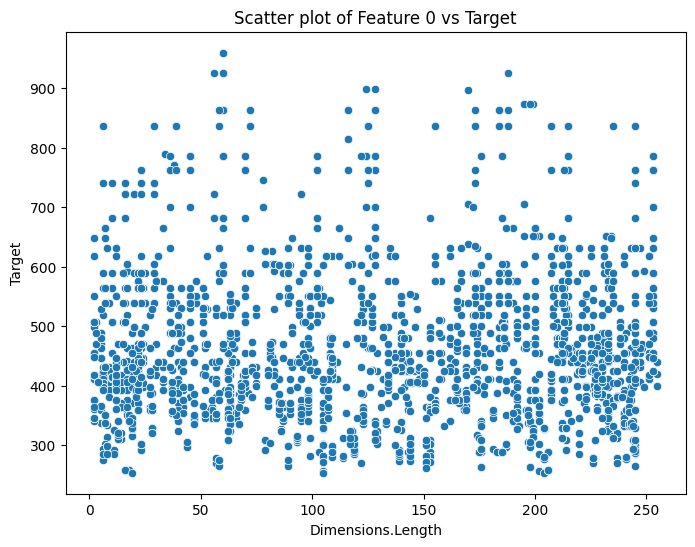

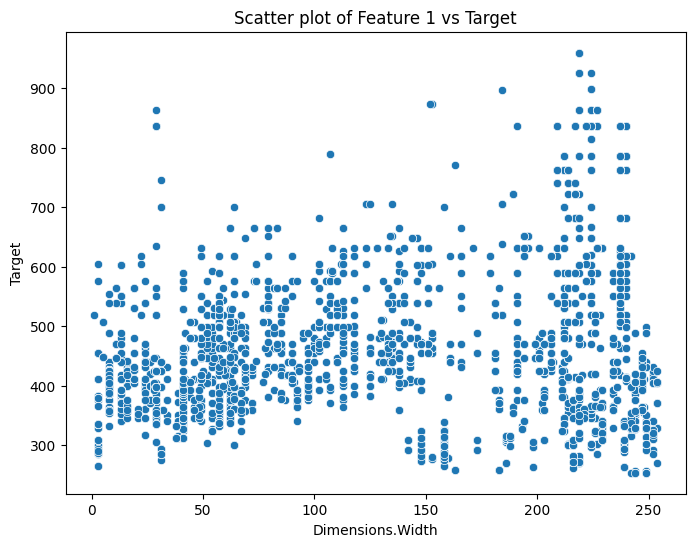

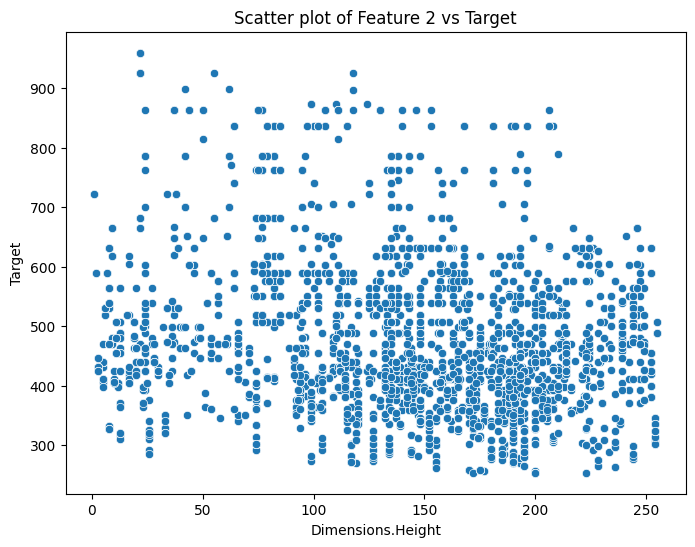

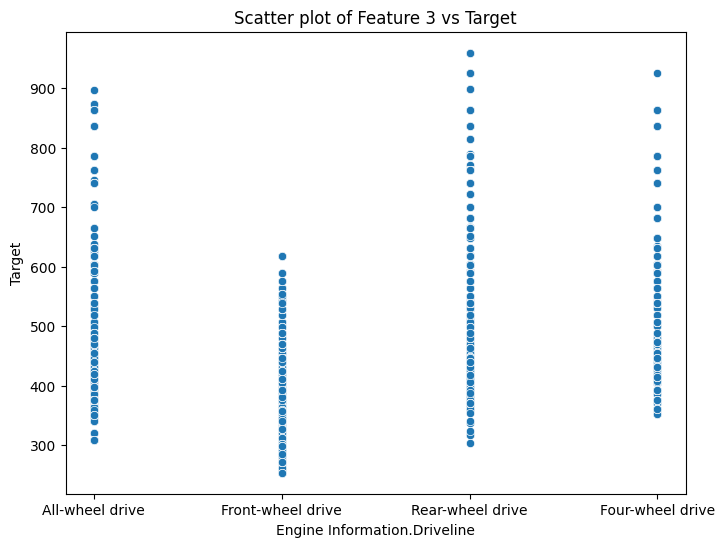

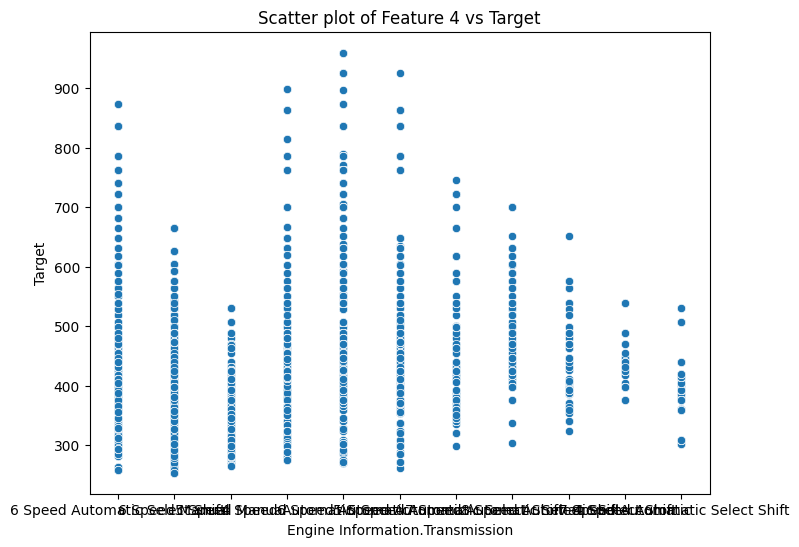

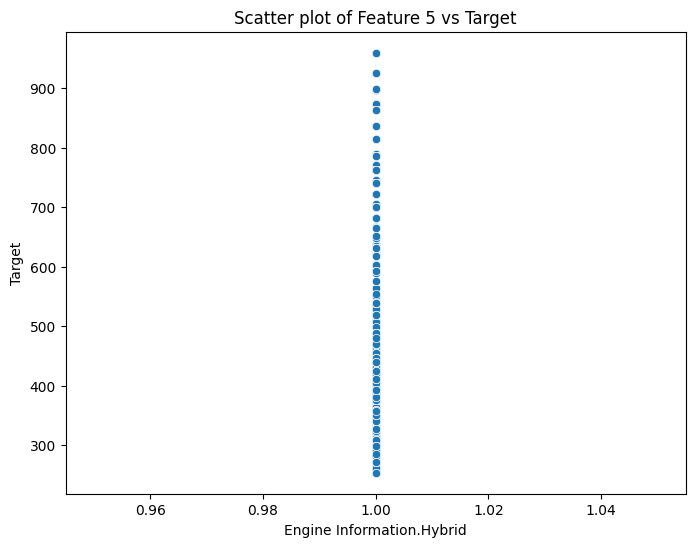

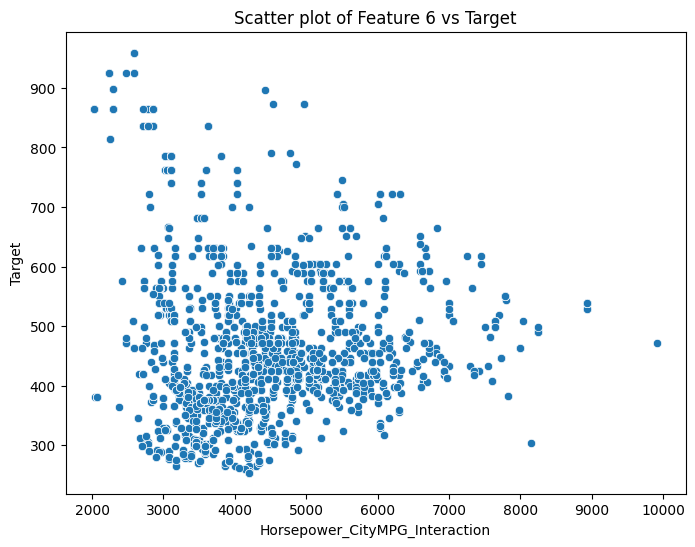

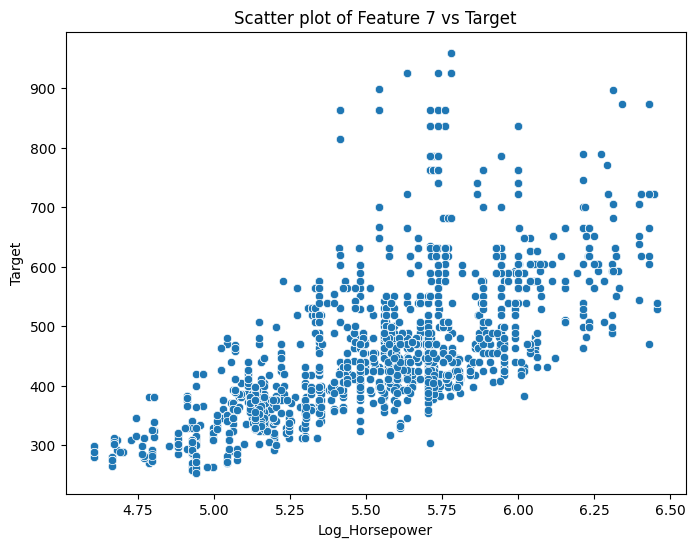

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in range(X.shape[1]):
    plt.figure(figsize=(8, 6))
    # Using .iloc to access data for plotting
    sns.scatterplot(x=X.iloc[:, i], y=y)
    plt.title(f'Scatter plot of Feature {i} vs Target')
    plt.xlabel(features[i])
    plt.ylabel('Target')
    plt.show()

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Convert X to numeric, handling non-numeric values
X_numeric = X.select_dtypes(include=np.number) # Select only numeric columns

vif_data = pd.DataFrame()
vif_data["Feature"] = X_numeric.columns  # Column names of the features
vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]

print(vif_data)

                          Feature        VIF
0               Dimensions.Length   3.745908
1                Dimensions.Width   4.712238
2               Dimensions.Height   6.297572
3  Horsepower_CityMPG_Interaction  25.572123
4                  Log_Horsepower  45.799911
